# Fuzzy logic

Install following prerequisities:

In [ ]:
# Example
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 14.6 MB/s eta 0:00:00


# Example 1

Create fuzzy sets for input variable temperature


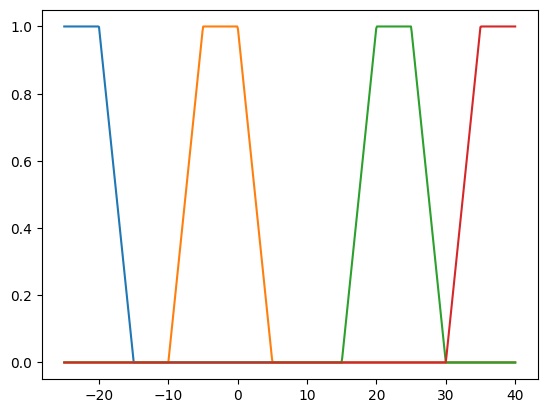

In [ ]:
# Example 1
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

temp_x = np.linspace(-25,40,650)

very_cold = fuzz.trapmf(temp_x, [-25, -25, -20, -15])
cold = fuzz.trapmf(temp_x,[-10,-5,0,5])
warm = fuzz.trapmf(temp_x,[15,20,25,30])
hot = fuzz.trapmf(temp_x,[30,35,45,50])

plt.plot(temp_x, very_cold)
plt.plot(temp_x, cold)
plt.plot(temp_x, warm)
plt.plot(temp_x,hot)



## Task 1

Create fuzzy set for cold, warm and hot and plot all memebership functions to a single graph.

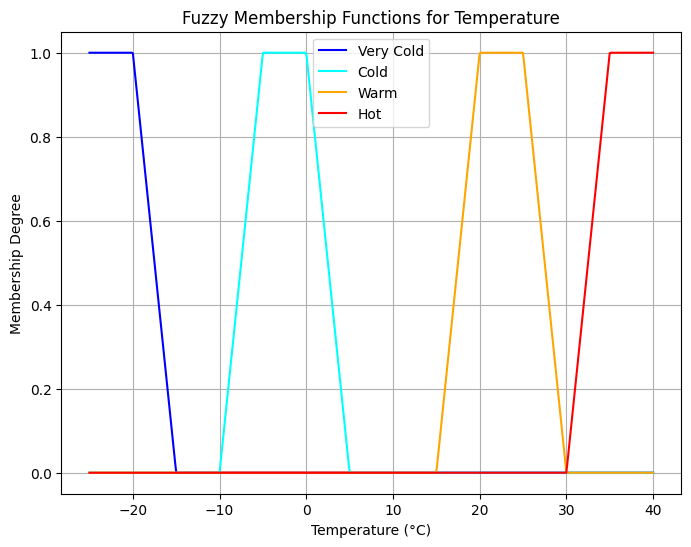

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Temperature range from -25 to 40 with 650 points
temp_x = np.linspace(-25, 40, 650)

# Defining the fuzzy membership functions using trapezoidal shapes
very_cold = fuzz.trapmf(temp_x, [-25, -25, -20, -15])
cold = fuzz.trapmf(temp_x, [-10, -5, 0, 5])
warm = fuzz.trapmf(temp_x, [15, 20, 25, 30])
hot = fuzz.trapmf(temp_x, [30, 35, 45, 50])

plt.figure(figsize=(8, 6))
plt.plot(temp_x, very_cold, label='Very Cold', color='blue')
plt.plot(temp_x, cold, label='Cold', color='cyan')
plt.plot(temp_x, warm, label='Warm', color='orange')
plt.plot(temp_x, hot, label='Hot', color='red')

# Adding labels and title
plt.title('Fuzzy Membership Functions for Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Membership Degree')

# Show the legend
plt.legend()

# Adding grid lines
plt.grid(True)

# Display the plot
plt.show()


## Task 2

Create fuzzy sets low, medium, high for heating.

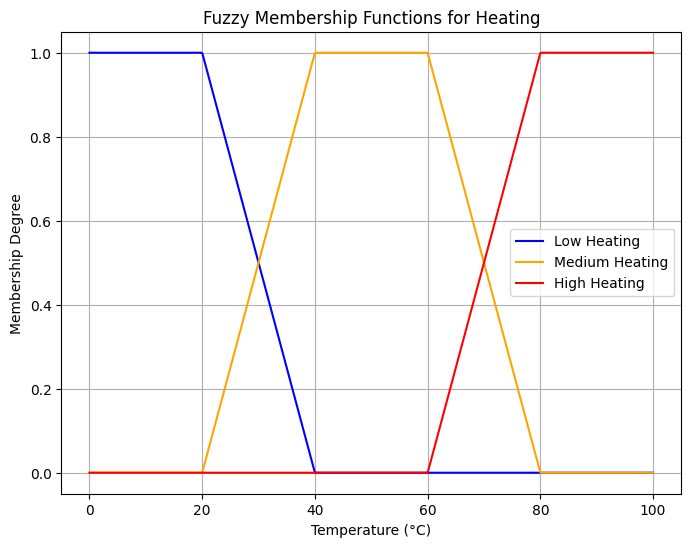

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

temp_x = np.linspace(0, 100, 650)

low_heating = fuzz.trapmf(temp_x, [-10, 0, 20, 40])
medium_heating = fuzz.trapmf(temp_x, [20, 40, 60, 80])
high_heating = fuzz.trapmf(temp_x, [60, 80, 100, 110])

plt.figure(figsize=(8, 6))
plt.plot(temp_x, low_heating, label='Low Heating', color='blue')
plt.plot(temp_x, medium_heating, label='Medium Heating', color='orange')
plt.plot(temp_x, high_heating, label='High Heating', color='red')

plt.title('Fuzzy Membership Functions for Heating')
plt.xlabel('Temperature (°C)')
plt.ylabel('Membership Degree')

plt.legend()
plt.grid(True)
plt.show()


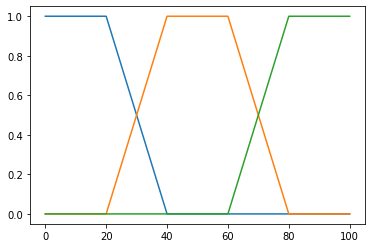

In [ ]:
Write your code here

## Task 3

Create fuzzy sets closed, partially, half, nearly, open.

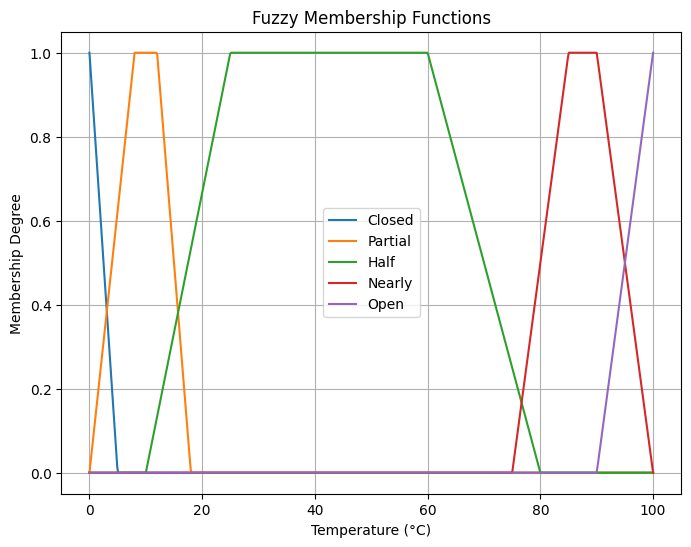

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

temp_x = np.linspace(0, 100, 650)

closed = fuzz.trapmf(temp_x, [-20, -10,  0 ,5])
partiallly = fuzz.trapmf(temp_x, [0,8, 12, 18])
half = fuzz.trapmf(temp_x, [10, 25, 60, 80])
nearly = fuzz.trapmf(temp_x,[75,85,90,100])
open = fuzz.trapmf(temp_x,[90, 100, 120, 140])


plt.figure(figsize=(8, 6))
plt.plot(temp_x, closed, label='Closed')
plt.plot(temp_x, partiallly, label='Partial')
plt.plot(temp_x, half, label='Half')
plt.plot(temp_x, nearly, label = 'Nearly')
plt.plot(temp_x, open , label ='Open')

plt.title('Fuzzy Membership Functions')
plt.xlabel('Temperature (°C)')
plt.ylabel('Membership Degree')

plt.legend()
plt.grid(True)
plt.show()


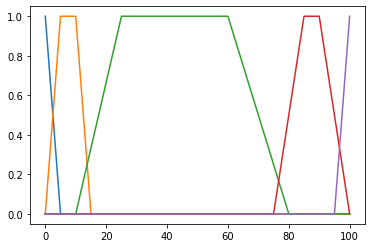

In [ ]:
Write your code here

## Task 4

According to this tutorial create fuzzy system.
https://pythonhosted.org/scikit-fuzzy/auto_examples/plot_tipping_problem_newapi.html


Create rules for our fuzzy variable window, temperature, heating and observe the fuzzy output.

Heating level for Temperature -25°C and Window 10%: 80.0365296803653%


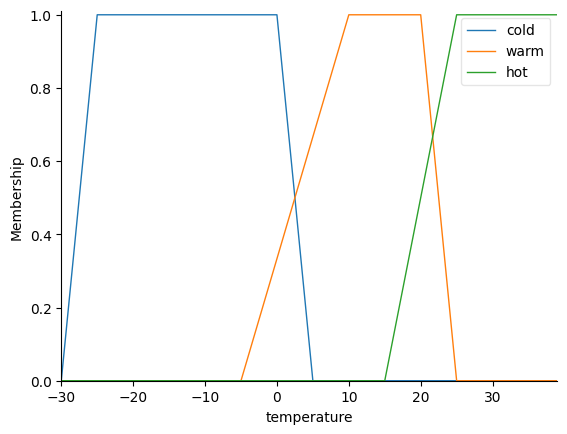

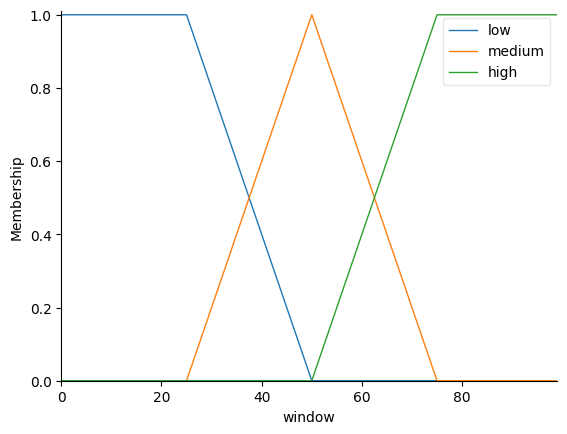

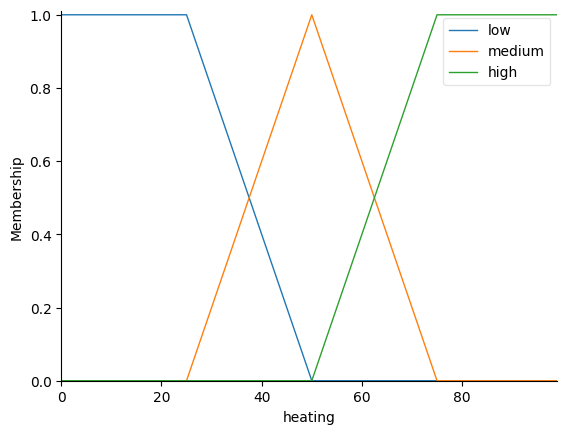

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Define the universe variables (temperature, window, and heating)
temperature = ctrl.Antecedent(np.arange(-30, 40, 1), 'temperature')
window = ctrl.Antecedent(np.arange(0, 100, 1), 'window')
heating = ctrl.Consequent(np.arange(0, 100, 1), 'heating')

# Define the fuzzy membership functions using trapezoidal membership functions (trapmf)
temperature['cold'] = fuzz.trapmf(temperature.universe, [-30, -25, 0, 5])
temperature['warm'] = fuzz.trapmf(temperature.universe, [-5, 10, 20, 25])
temperature['hot'] = fuzz.trapmf(temperature.universe, [15, 25, 40, 40])

window['low'] = fuzz.trapmf(window.universe, [0, 0, 25, 50])
window['medium'] = fuzz.trapmf(window.universe, [25, 50, 50, 75])
window['high'] = fuzz.trapmf(window.universe, [50, 75, 100, 100])

heating['low'] = fuzz.trapmf(heating.universe, [0, 0, 25, 50])
heating['medium'] = fuzz.trapmf(heating.universe, [25, 50, 50, 75])
heating['high'] = fuzz.trapmf(heating.universe, [50, 75, 100, 100])

# Define fuzzy rules
rule1 = ctrl.Rule(temperature['cold'] & window['low'], heating['high'])
rule2 = ctrl.Rule(temperature['cold'] & window['medium'], heating['medium'])
rule3 = ctrl.Rule(temperature['cold'] & window['high'], heating['low'])

rule4 = ctrl.Rule(temperature['warm'] & window['low'], heating['medium'])
rule5 = ctrl.Rule(temperature['warm'] & window['medium'], heating['low'])
rule6 = ctrl.Rule(temperature['warm'] & window['high'], heating['low'])

rule7 = ctrl.Rule(temperature['hot'] & window['low'], heating['low'])
rule8 = ctrl.Rule(temperature['hot'] & window['medium'], heating['low'])
rule9 = ctrl.Rule(temperature['hot'] & window['high'], heating['low'])

# Create control system and simulation
heating_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
heating_sim = ctrl.ControlSystemSimulation(heating_ctrl)

# Provide input values for temperature and window
heating_sim.input['temperature'] = -25  # Temperature = -25°C
heating_sim.input['window'] = 10       # Window opening = 10%

# Compute the output (heating)
heating_sim.compute()

# Print the resulting heating output
print(f"Heating level for Temperature -25°C and Window 10%: {heating_sim.output['heating']}%")

# Plot the membership functions
temperature.view()
window.view()
heating.view()


In [ ]:
print(heating_sim.output)

{'heating': 80.0365296803653}
